# Επισκευές/Ενισχύσεις - Μέρος 1 (Μαρτ.2021)

In [1]:
from streng.ppp.sections.geometry.rectangular import RectangularSectionGeometry
from streng.ppp.sections.geometry.tee import TeeSectionGeometry
from streng.codes.eurocodes.ec8.cls.seismic_action.spectra import SpectraEc8
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import openseespy.opensees as ops
import openseespy.postprocessing.ops_vis as opsv

## Εισαγωγή αριθμού μητρώου φοιτητών

Αντικαταστήστε τα ψηφία με αυτά του αριθμού μητρώου σας και τρέξτε το jupyter notebook.  
Δε θα χρειαστεί να κάνετε κάποια άλλη αλλαγή ή κάποια εισαγωγή δεδομένων

In [2]:
κ, λ, μ, ν = 9, 8, 7, 6

## Δεδομένα

In [3]:
# Δεδομένα φοιτητών βάσει ΑΕΜ
L = 5.8+0.05*μ
H_is = 3.8+0.05*ν
H_or = 2.8+0.05*ν

if ν<5:
    bc_is=hc_is=0.35
    bc_or=hc_or=0.30
    bw=0.25
    h_is=0.65
    h_or=0.55
else:
    bc_is=hc_is=0.40
    bc_or=hc_or=0.35
    bw=0.25
    h_is=0.70
    h_or=0.60

g = 28.5 + 0.2*κ + 0.5*λ+ 0.4*μ
q = 7.2 + 0.2*κ + 0.2*λ + 0.4*μ
    
cnom = 0.025    
    
fcm = 19+0.4*μ+0.2*ν # σε (MPa)
Ecm = round(22*(fcm/10)**0.3,1)
   
E=2.8*10**7
U = 0.0

if ν<5:
    agR = 0.24
    ductility_class = 'H'
    ground_type = 'B'
    importance = 'III'
    γI=1.2
    q = 4.5 * 1.3
    
else:
    agR = 0.36
    ductility_class = 'M'
    ground_type = 'C'
    importance = 'II' 
    γI=1.0
    q = 3.0 * 1.3

ag = agR*γI

specEC8 = SpectraEc8(αgR=agR,
                     γI=γI,
                     ground_type = ground_type,
                     spectrum_type = 
                     1,
                     η=1.0,
                     q=q,
                     β=0.2)

### Μάζα

In [4]:
mass = (g+0.3*q)*L*2 / 9.81

## Εμφάνιση αρχικών αποτελεσμάτων (πριν το τρέξιμο της ανάλυσης)

In [5]:
print('Διαστάσεις φορέα')
print(f'L = {L:.2f}m')
print(f'H_ισογ = {H_is:.2f}m')
print(f'H_ορ = {H_or:.2f}m')
print('')
print('Διαστάσεις δοκών')
print(f'Δοκοί ισογείου: b = {bw:.2f}m   h={h_is:.2f}m')
print(f'Δοκοί ορόφων:   b = {bw:.2f}m   h={h_or:.2f}m')
print('')
print('Διαστάσεις στύλων')
print(f'Στύλοι ισογείου: b = {bc_is:.2f}m   h={bc_is:.2f}m')
print(f'Στύλοι ορόφων:   b = {bc_or:.2f}m   h={bc_or:.2f}m')
print('')
print('Υλικά')
print('Σκυρόδεμα')
print(f'fcm = {fcm:.2f}MPa   Ecm={Ecm:.1f}GPa')
print('')
print('Φορτία δοκών')
print(f'g = {g:.2f}kN/m   q={q:.2f}kN/m')
print('')
print('Μάζες')
print(f'm = {mass:.2f}t (ίση σε όλους τους ορόφους)')
print('')
print('Δεδομένα φάσματος σχεδιασμού')
print(f'γI = {γI:.2f} για κατηγορία σπουδαιότητας {importance}')
print(f'agR = {agR:.3f}g = {agR*9.81:.3f}m/sec2')
print(f'ag = {ag:.3f}g = {ag*9.81:.3f}m/sec2')
print(f'Κατηγορία πλαστιμότητας = DC{ductility_class}')
print(f'Κατηγορία εδάφους: {ground_type}')
print(f'TB = {specEC8.TB:.2f}sec')
print(f'TC = {specEC8.TC:.2f}sec')
print(f'TD = {specEC8.TD:.2f}sec')
print(f'S = {specEC8.S:.2f}sec')
print(f'Συντελεστής συμπεριφοράς q = {specEC8.q:.2f}')

Διαστάσεις φορέα
L = 6.15m
H_ισογ = 4.10m
H_ορ = 3.10m

Διαστάσεις δοκών
Δοκοί ισογείου: b = 0.25m   h=0.70m
Δοκοί ορόφων:   b = 0.25m   h=0.60m

Διαστάσεις στύλων
Στύλοι ισογείου: b = 0.40m   h=0.40m
Στύλοι ορόφων:   b = 0.35m   h=0.35m

Υλικά
Σκυρόδεμα
fcm = 23.00MPa   Ecm=28.2GPa

Φορτία δοκών
g = 37.10kN/m   q=3.90kN/m

Μάζες
m = 47.98t (ίση σε όλους τους ορόφους)

Δεδομένα φάσματος σχεδιασμού
γI = 1.00 για κατηγορία σπουδαιότητας II
agR = 0.360g = 3.532m/sec2
ag = 0.360g = 3.532m/sec2
Κατηγορία πλαστιμότητας = DCM
Κατηγορία εδάφους: C
TB = 0.20sec
TC = 0.60sec
TD = 2.00sec
S = 1.15sec
Συντελεστής συμπεριφοράς q = 3.90


## Αρχικό τρέξιμο - Υπολογισμός ιδιομορφών/ιδιοπεριόδων

### Διατομές

In [6]:
beam_is = RectangularSectionGeometry(b=bw, h=h_is)
A_beam_is = beam_is.area
Iz_beam_is = beam_is.moment_of_inertia_xx * 0.5
Avy_beam_is = beam_is.shear_area_2 * 0.5

beam_or = RectangularSectionGeometry(b=bw, h=h_or)
A_beam_or = beam_or.area
Iz_beam_or = beam_or.moment_of_inertia_xx * 0.5
Avy_beam_or = beam_or.shear_area_2 * 0.5

col_is = RectangularSectionGeometry(b=bc_is, h=hc_is)
A_col_is = col_is.area
Iz_col_is = col_is.moment_of_inertia_xx * 0.5
Avy_col_is = col_is.shear_area_2 * 0.5

col_or = RectangularSectionGeometry(b=bc_or, h=hc_or)
A_col_or = col_or.area
Iz_col_or = col_or.moment_of_inertia_xx * 0.5
Avy_col_or = col_or.shear_area_2 * 0.5


### Ανάλυση στο OpenSees για υπολογισμό ιδιομορφών

In [7]:
ops.wipe()
ops.model('basic', '-ndm', 2, '-ndf', 3)

E = Ecm * 10**6
U = 0.2
G = E / (2.0*(1.0+U))

ops.node(1, 0., 0.)
ops.node(2, 0., H_is)
ops.node(3, 0., H_is+H_or)
ops.node(4, 0., H_is+2*H_or)
ops.node(5, L, 0.)
ops.node(6, L, H_is)
ops.node(7, L, H_is+H_or)
ops.node(8, L, H_is+2*H_or)
ops.node(9, 2*L, 0.)
ops.node(10, 2*L, H_is)
ops.node(11, 2*L, H_is+H_or)
ops.node(12, 2*L, H_is+2*H_or)

ops.fix(1, 1, 1, 1)
ops.fix(5, 1, 1, 1)
ops.fix(9, 1, 1, 1)

ops.geomTransf('Linear', 1)

ops.mass(int(2), mass, 1.0e-10, 1.0e-10)
ops.mass(int(3), mass, 1.0e-10, 1.0e-10)
ops.mass(int(4), mass, 1.0e-10, 1.0e-10)

for node in [6, 10]:
    ops.equalDOF(2, node, 1)
for node in [7, 11]:
    ops.equalDOF(3, node, 1)
for node in [8, 12]:
    ops.equalDOF(4, node, 1)

# Στύλοι             
ops.element('ElasticTimoshenkoBeam', 1, 1, 2, E, G, A_col_is, Iz_col_is, Avy_col_is, 1)  # , '-mass', 0., '-lMass')
ops.element('ElasticTimoshenkoBeam', 2, 2, 3, E, G, A_col_or, Iz_col_or, Avy_col_or, 1)  # , '-mass', 0., '-lMass')
ops.element('ElasticTimoshenkoBeam', 3, 3, 4, E, G, A_col_or, Iz_col_or, Avy_col_or, 1)  # , '-mass', 0., '-lMass')
ops.element('ElasticTimoshenkoBeam', 4, 5, 6, E, G, A_col_is, Iz_col_is, Avy_col_is, 1)  # , '-mass', 0., '-lMass')
ops.element('ElasticTimoshenkoBeam', 5, 6, 7, E, G, A_col_or, Iz_col_or, Avy_col_or, 1)  # , '-mass', 0., '-lMass')
ops.element('ElasticTimoshenkoBeam', 6, 7, 8, E, G, A_col_or, Iz_col_or, Avy_col_or, 1)  # , '-mass', 0., '-lMass')
ops.element('ElasticTimoshenkoBeam', 7, 9, 10, E, G, A_col_is, Iz_col_is, Avy_col_is, 1)  # , '-mass', 0., '-lMass')
ops.element('ElasticTimoshenkoBeam', 8, 10, 11, E, G, A_col_or, Iz_col_or, Avy_col_or, 1)  # , '-mass', 0., '-lMass')
ops.element('ElasticTimoshenkoBeam', 9, 11, 12, E, G, A_col_or, Iz_col_or, Avy_col_or, 1)  # , '-mass', 0., '-lMass')
# Δοκοί
ops.element('ElasticTimoshenkoBeam', 10, 2, 6, E, G, A_beam_is, Iz_beam_is, Avy_beam_is, 1)  # , '-mass', 0., '-lMass')
ops.element('ElasticTimoshenkoBeam', 11, 3, 7, E, G, A_beam_or, Iz_beam_or, Avy_beam_or, 1)  # , '-mass', 0., '-lMass')  
ops.element('ElasticTimoshenkoBeam', 12, 4, 8, E, G, A_beam_or, Iz_beam_or, Avy_beam_or, 1)  # , '-mass', 0., '-lMass')  
ops.element('ElasticTimoshenkoBeam', 13, 6, 10, E, G, A_beam_is, Iz_beam_is, Avy_beam_is, 1)  # , '-mass', 0., '-lMass')
ops.element('ElasticTimoshenkoBeam', 14, 7, 11, E, G, A_beam_or, Iz_beam_or, Avy_beam_or, 1)  # , '-mass', 0., '-lMass')  
ops.element('ElasticTimoshenkoBeam', 15, 8, 12, E, G, A_beam_or, Iz_beam_or, Avy_beam_or, 1)  # , '-mass', 0., '-lMass')   
             
elem_type = {1: 'col',
             2: 'col',
             3: 'col',
             4: 'col',
             5: 'col',
             6: 'col',
             7: 'col',
             8: 'col',
             9: 'col',
             10: 'beam',
             11: 'beam',
             12: 'beam',
             13: 'beam',
             14: 'beam',
             15: 'beam'}

numEigen = 1
eigenValues = ops.eigen('-fullGenLapack', numEigen)

_periods = []
for i in range(0, numEigen):
    lamb = eigenValues[i]
    period = 2 * np.pi / np.sqrt(lamb)
    _periods.append(period)
    
    eigen_vector = []
    for mn in [2, 3, 4]: # self.model.master_nodes:
        # print(f'eigen {i} mn {mn}')
        eigen_vector.append(ops.nodeEigenvector(mn, i+1, 1))

results_ele = []

### Αποτελέσματα 1ης ιδιομοφής

In [8]:
print(f'Θεμελιώδης ιδιοπερίοδος T{i+1} = {period:.3f}s')
print('Συνιστώσες 1ης ιδιομορφής (δε θα δείτε ακριβώς τα ίδια νούμερα, θα έχετε όμως τις ίδιες αναλογίες):')
print([f'{e:.4f}' for e in eigen_vector])

Θεμελιώδης ιδιοπερίοδος T1 = 0.902s
Συνιστώσες 1ης ιδιομορφής (δε θα δείτε ακριβώς τα ίδια νούμερα, θα έχετε όμως τις ίδιες αναλογίες):
['0.4389', '0.7865', '1.0000']


## Υπολογισμός σεισμικών δράσεων

In [9]:
Sd_T = specEC8.Sd(period) * 9.81
M = mass * 3.

if period <= 2*specEC8.TC:
    λ_ec8 = 0.85
else:
    λ_ec8 = 1.0
    
Fb = M * Sd_T * λ_ec8

eigen_vector_array = np.array(eigen_vector)
mass_array = np.array([mass, mass, mass])

In [10]:
print(f'Επιτάχυνση σχεδιασμού Sd(T) = {Sd_T:.3f}m/sec2')
print(f'Μάζα για το σύνολο του κτιρίου M = {M:.2f}t')
print(f'λ = {λ_ec8}')
print(f'Τέμνουσα βάσης Fb = {Fb:.2f}kN')

Επιτάχυνση σχεδιασμού Sd(T) = 1.733m/sec2
Μάζα για το σύνολο του κτιρίου M = 143.95t
λ = 0.85
Τέμνουσα βάσης Fb = 212.01kN


In [11]:
eigen_vector_array

array([0.43887516, 0.78647881, 1.        ])

In [12]:
Fi = (eigen_vector_array * mass_array) * Fb /sum(eigen_vector_array * mass_array)

In [13]:
for _i, _fi in enumerate(Fi):
    print(f'F{_i+1} = {_fi:.2f}kN')
    

F1 = 41.81kN
F2 = 74.93kN
F3 = 95.27kN


### Επίλυση στο OpenSees για G+0.3Q+Ex

In [14]:
results_ele = []

# G+0.3Q+Ex Analysis
ops.timeSeries('Constant', 1)
ops.pattern('Plain', 1, 1)
ops.load(2, Fi[0], 0., 0.)
ops.load(3, Fi[1], 0., 0.)
ops.load(4, Fi[2], 0., 0.)
ops.eleLoad('-ele', 10, '-type', '-beamUniform', -(g+0.3*q))
ops.eleLoad('-ele', 11, '-type', '-beamUniform', -(g+0.3*q))
ops.eleLoad('-ele', 12, '-type', '-beamUniform', -(g+0.3*q))
ops.eleLoad('-ele', 13, '-type', '-beamUniform', -(g+0.3*q))
ops.eleLoad('-ele', 14, '-type', '-beamUniform', -(g+0.3*q))
ops.eleLoad('-ele', 15, '-type', '-beamUniform', -(g+0.3*q))
ops.constraints('Transformation')
ops.numberer('RCM')
ops.system('BandGeneral')
ops.test('NormDispIncr', 1.0e-6, 6, 2)
ops.algorithm('Linear')
ops.integrator('LoadControl', 1)
ops.analysis('Static')
ops.analyze(1)

results_ele.extend([['G+0.3Q+Ex', ele, elem_type[ele]] + ops.eleForce(ele) for ele in range(1, 16)])

ops.remove('timeSeries', 1)
ops.remove('loadPattern', 1)
ops.wipeAnalysis()

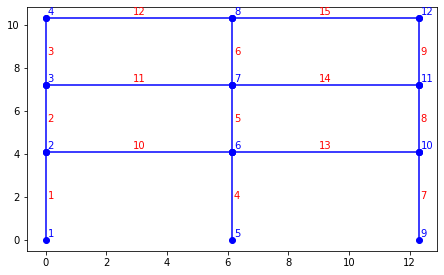

In [15]:
opsv.plot_model()

In [16]:
def ops_to_mvn(row):
    if row['elem_type'] == 'col':
        Ni = - row['Fyi_']
        Nj = + row['Fyj_']
        Vi = - row['Fxi_']
        Vj = + row['Fxj_']
        Mi = + row['Mi_']
        Mj = - row['Mj_']
    else:
        Ni = - row['Fxi_']
        Nj = row['Fxj_']
        Vi = - row['Fyi_']
        Vj = + row['Fyj_']  
        Mi = - row['Mi_']
        Mj = + row['Mj_']
    return Ni, Nj, Vi, Vj, Mi, Mj

results_df = pd.DataFrame(data=results_ele,
                          columns =['load_case', 'elem_id', 'elem_type', 'Fxi_', 'Fyi_', 'Mi_', 'Fxj_', 'Fyj_', 'Mj_'])

results_df['Ni'], results_df['Nj'], results_df['Vi'], results_df['Vj'], \
    results_df['Mi'], results_df['Mj'] = zip(*results_df.apply(ops_to_mvn, axis=1))

results_df.round(2)

,load_case,elem_id,elem_type,Fxi_,Fyi_,Mi_,Fxj_,Fyj_,Mj_,Ni,Nj,Vi,Vj,Mi,Mj
0,G+0.3Q+Ex,1,col,-54.91,216.55,138.21,54.91,-216.55,86.91,-216.55,-216.55,54.91,54.91,138.21,-86.91
1,G+0.3Q+Ex,2,col,-25.00,165.20,37.73,25.00,-165.20,39.79,-165.20,-165.20,25.00,25.00,37.73,-39.79
2,G+0.3Q+Ex,3,col,5.77,88.69,-11.54,-5.77,-88.69,-6.34,-88.69,-88.69,-5.77,-5.77,-11.54,6.34
3,G+0.3Q+Ex,4,col,-81.26,781.69,173.73,81.26,-781.69,159.42,-781.69,-781.69,81.26,81.26,173.73,-159.42
4,G+0.3Q+Ex,5,col,-74.70,519.71,116.82,74.70,-519.71,114.74,-519.71,-519.71,74.70,74.70,116.82,-114.74
5,G+0.3Q+Ex,6,col,-43.01,266.47,62.49,43.01,-266.47,70.84,-266.47,-266.47,43.01,43.01,62.49,-70.84
6,G+0.3Q+Ex,7,col,-75.84,413.92,166.43,75.84,-413.92,144.53,-413.92,-413.92,75.84,75.84,166.43,-144.53
7,G+0.3Q+Ex,8,col,-70.50,256.54,106.66,70.50,-256.54,111.87,-256.54,-256.54,70.50,70.50,106.66,-111.87
8,G+0.3Q+Ex,9,col,-58.03,115.56,79.12,58.03,-115.56,100.78,-115.56,-115.56,58.03,58.03,79.12,-100.78
9,G+0.3Q+Ex,10,beam,0.00,51.36,-124.64,0.00,184.01,-283.26,-0.00,0.00,-51.36,184.01,124.64,-283.26
